# **WHAT'S TRENDING?**
**By Data Scientist: Gabe Cavazos, Adriana Nuncio, & DeAdrien Hill**

# Acquire


In [35]:
# Imports
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import prepare_github as prepare
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#ignore all warnings, it's all good, trust me
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Read data into a dataframe
df = pd.read_csv('combined_data_ready.csv')

In [3]:
# Show first few rows
df.head()

,repo,language,original,clean,stemmed,lemmatized
0,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...
1,angular/angular.js,JavaScript,AngularJS [![CircleCI](https://circleci.com/gh...,angularjs circlecihttpscirclecicomghangularang...,angularj circlecihttpscirclecicomghangularangu...,angularjs circlecihttpscirclecicomghangularang...
2,trekhleb/javascript-algorithms,JavaScript,# Algorithms and Data Structures\n\n> 🇺🇦 UKRA...,algorithms data structures ukraine attackedhtt...,algorithm data structur ukrain attackedhttpswa...,algorithms data structure ukraine attackedhttp...
3,jquery/jquery,JavaScript,[jQuery](https://jquery.com/) — New Wave \n===...,jqueryhttpsjquerycom new wave gitterhttpsbadge...,jqueryhttpsjquerycom new wave gitterhttpsbadge...,jqueryhttpsjquerycom new wave gitterhttpsbadge...
4,TheOdinProject/javascript-exercises,JavaScript,# Exercises\n\nThese exercises are intended ...,exercises exercises intended complement conten...,exercis exercis intend complement content odin...,exercise exercise intend complement content od...


# Prepare

In [7]:
# Call prepare function 
df = prepare.transform_data(df)

In [8]:
# Verify updated values
df.head()

,repo,language,original,clean,stemmed,lemmatized,readme_length,language_code,lematized
0,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,40283,2,nightscout web monitor aka cgmremotemonitor ni...
1,angular/angular.js,JavaScript,AngularJS [![CircleCI](https://circleci.com/gh...,angularjs circlecihttpscirclecicomghangularang...,angularj circlecihttpscirclecicomghangularangu...,angularjs circlecihttpscirclecicomghangularang...,4226,2,angularjs circlecihttpscirclecicomghangularang...
2,trekhleb/javascript-algorithms,JavaScript,# Algorithms and Data Structures\n\n> 🇺🇦 UKRA...,algorithms data structures ukraine attackedhtt...,algorithm data structur ukrain attackedhttpswa...,algorithms data structure ukraine attackedhttp...,16877,2,algorithms data structure ukraine attackedhttp...
3,jquery/jquery,JavaScript,[jQuery](https://jquery.com/) — New Wave \n===...,jqueryhttpsjquerycom new wave gitterhttpsbadge...,jqueryhttpsjquerycom new wave gitterhttpsbadge...,jqueryhttpsjquerycom new wave gitterhttpsbadge...,2623,2,jqueryhttpsjquerycom new wave gitterhttpsbadge...
4,TheOdinProject/javascript-exercises,JavaScript,# Exercises\n\nThese exercises are intended ...,exercises exercises intended complement conten...,exercis exercis intend complement content odin...,exercise exercise intend complement content od...,2838,2,exercise exercise intend complement content od...


In [9]:
# Check the shape of the DataFrame
df.shape

(119, 9)

In [10]:
# Get summary statistics of the DataFrame
df.describe()

,readme_length,language_code
count,119.000000,119.000000
mean,9475.579832,1.487395
std,21372.296905,1.118909
min,111.000000,0.000000
25%,2216.000000,0.500000
50%,4031.000000,1.000000
75%,6966.500000,2.000000
max,143616.000000,3.000000


# Exploration 

We are looking to gain insights into the programming language distribution in GitHub repositories and to identify any patterns or trends related to programming languages based on readme text. This information can be useful for developers and organizations to prioritize their language learning or investment decisions.

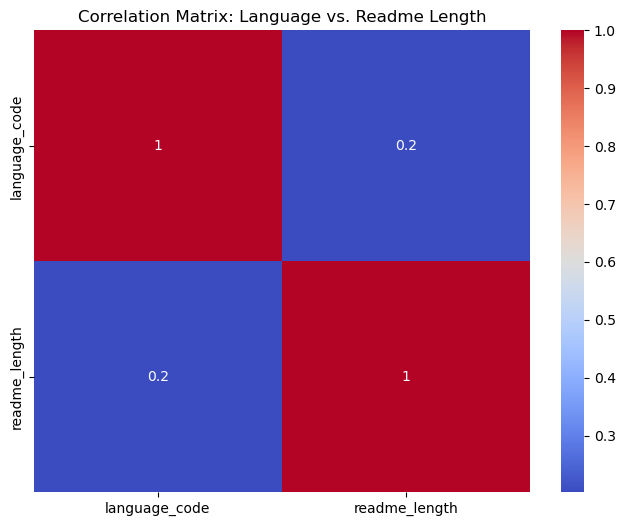

In [39]:
# Convert language labels to numerical values
df['language_code'] = df['language'].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df[['language_code', 'readme_length']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Language vs. Readme Length')
plt.show()


JavaScript    30
Java          30
C             30
Python        29
Name: language, dtype: int64


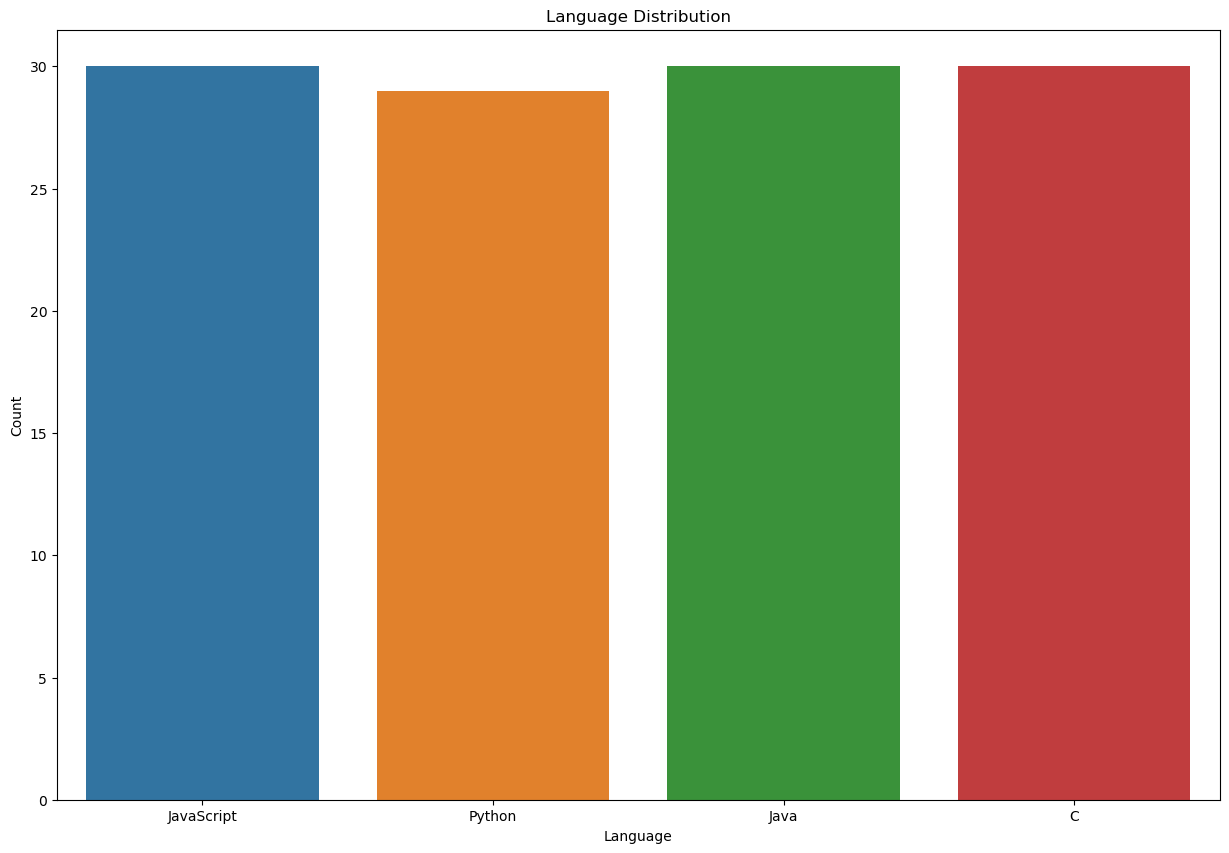

In [40]:
# Count the number of each language
language_counts = df['language'].value_counts()
print(language_counts)

# Language distribution
plt.figure(figsize=(15, 10))
sns.countplot(x='language', data=df)
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

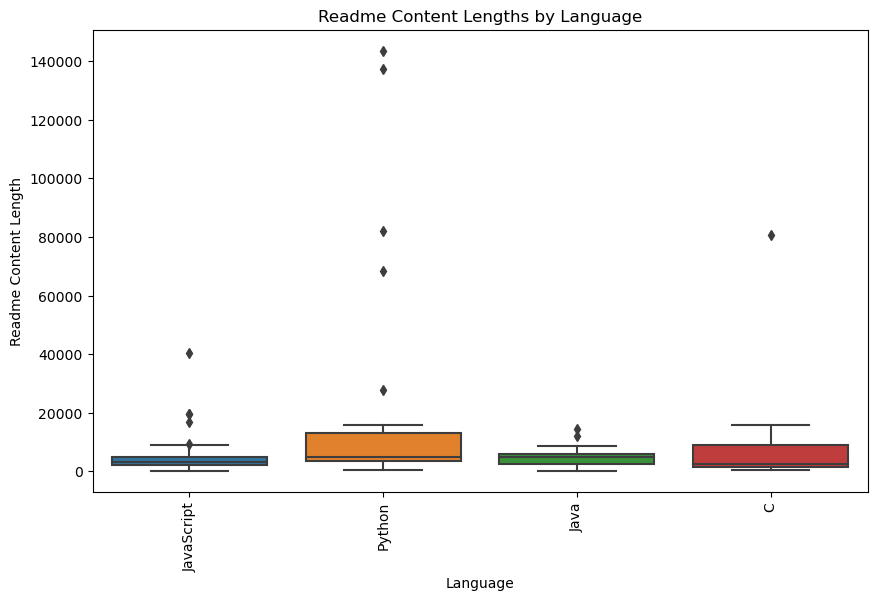

In [37]:
# Add a column for readme content lengths
df['readme_length'] = df['clean'].apply(len)

# Box plot of readme content lengths by language
plt.figure(figsize=(10, 6))
sns.boxplot(x='language', y='readme_length', data=df)
plt.title('Readme Content Lengths by Language')
plt.xlabel('Language')
plt.ylabel('Readme Content Length')
plt.xticks(rotation=90)
plt.show()

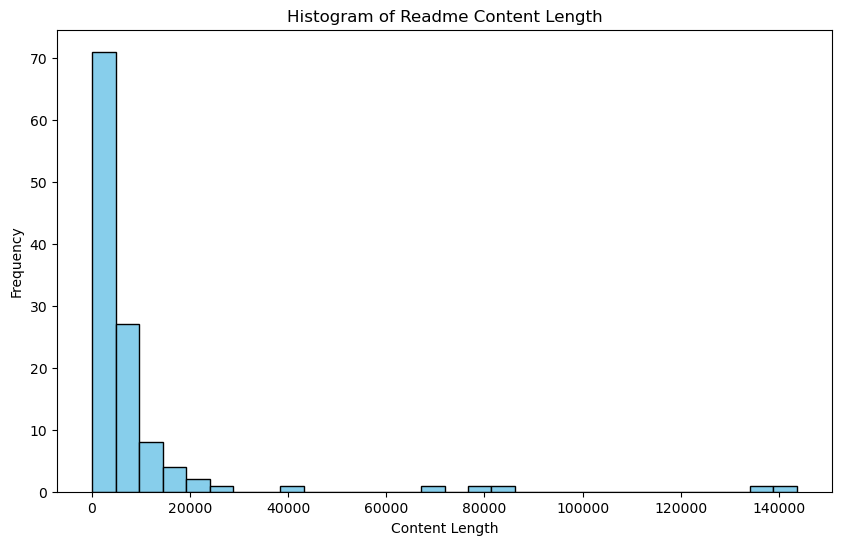

In [13]:
# Calculate the length of each readme content
df['content_length'] = df['clean'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['content_length'], bins=30, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Histogram of Readme Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')

# Display the plot
plt.show()


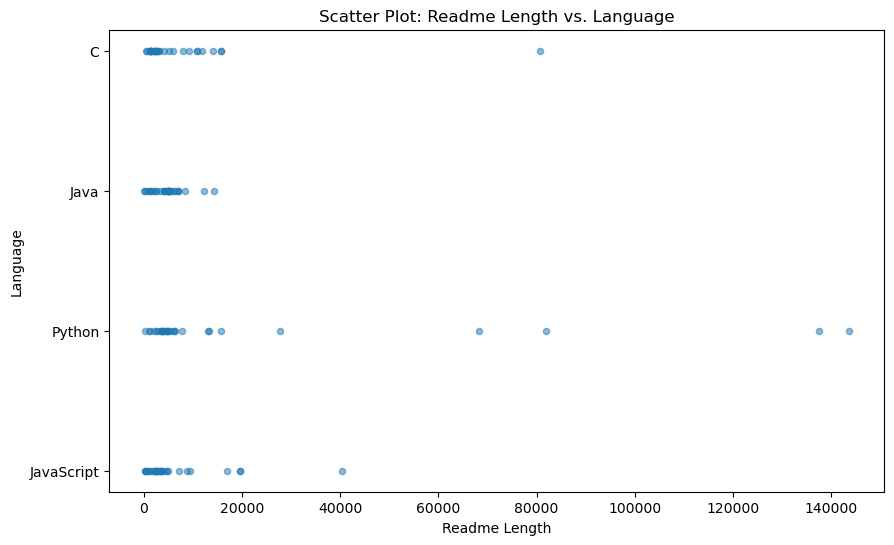

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['readme_length'], df['language'], s=20, alpha=0.5)

# Customize the plot
plt.title('Scatter Plot: Readme Length vs. Language')
plt.xlabel('Readme Length')
plt.ylabel('Language')

# Display the plot
plt.show()



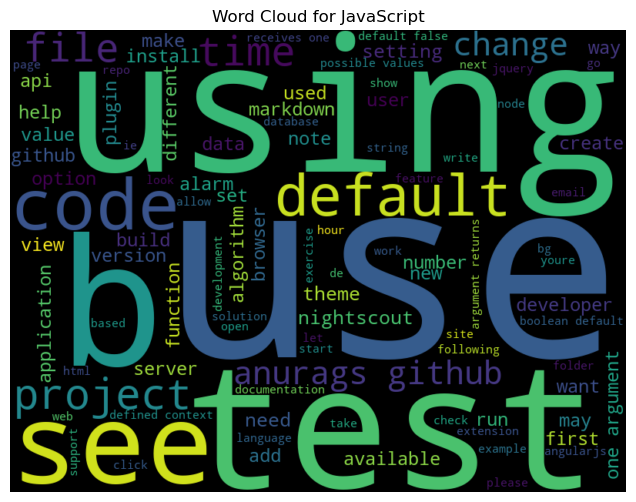

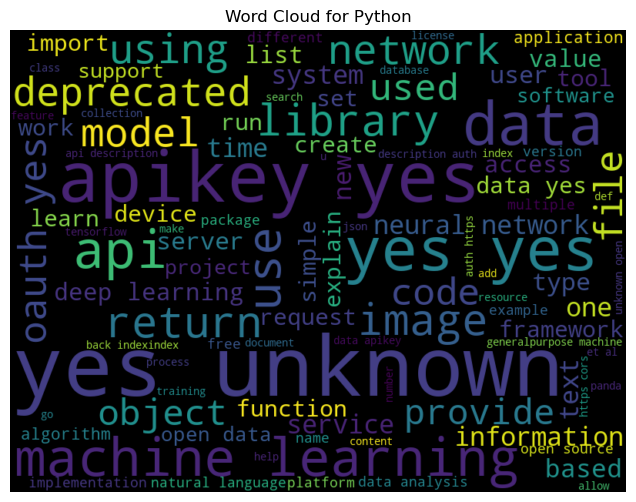

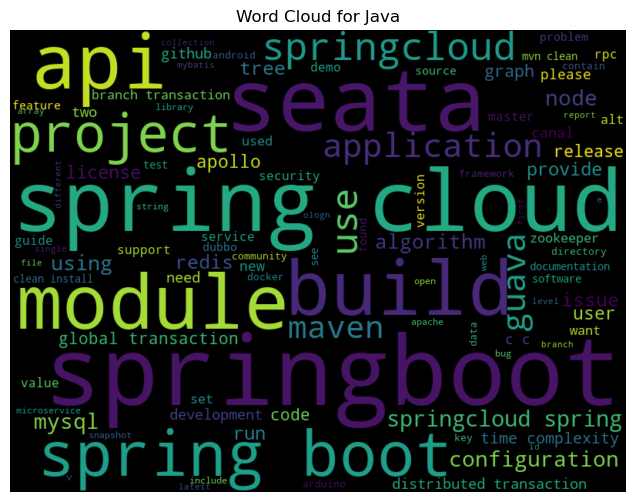

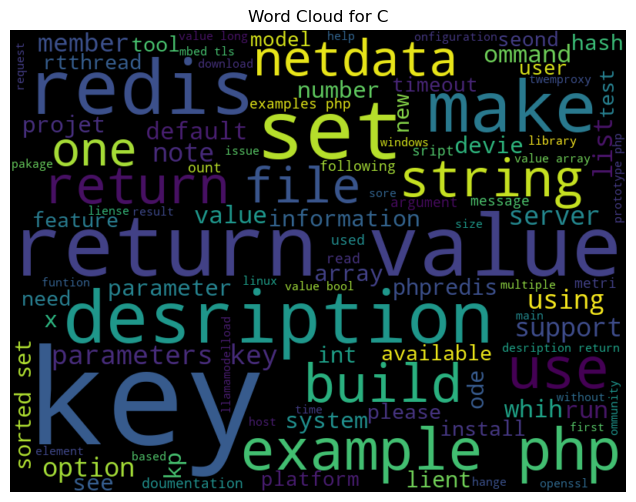

In [38]:
# Create a word cloud for each language
languages = df['language'].unique()
for language in languages:
    plt.figure(figsize=(8, 6))
    subset = df[df['language'] == language]
    text = ' '.join(subset['clean'])
    wordcloud = WordCloud(width=800, height=600, max_words=100).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {language}')
    plt.axis('off')
    plt.show()

# Stats Test

# 1. Is there an equal breakdown in the trending programming languages?


In [15]:
# Create a contingency table of language frequencies
contingency_table = pd.crosstab(df['language'], columns='count')

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the null hypothesis should be rejected
if p_value < alpha:
    print("Null hypothesis (H0): The frequencies of all programming languages in the dataset are equal.")
else:
    print("Alternative hypothesis (Ha): The frequencies of programming languages in the dataset are not equal.")

Alternative hypothesis (Ha): The frequencies of programming languages in the dataset are not equal.


# 2. What is the most popular trending programming langauge?

In [16]:
contingency_table

col_0,count
language,
C,30
Java,30
JavaScript,30
Python,29


# 3.  Does readme length play a factor in the programming language?

In [17]:
# Perform one-way ANOVA
result = f_oneway(df['readme_length'][df['language'] == 'Python'],
                  df['readme_length'][df['language'] == 'JavaScript'],
                  df['readme_length'][df['language'] == 'Java'],
                  df['readme_length'][df['language'] == 'Ruby'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the null hypothesis should be rejected
if result.pvalue < alpha:
    print("Null Hypothesis (H0): There is no significant difference in the mean readme length across different programming languages.")
else:
    print("Alternative Hypothesis (HA): There is a significant difference in the mean readme length across different programming languages.")

Alternative Hypothesis (HA): There is a significant difference in the mean readme length across different programming languages.


# 4. Are there any common words or phrases that are indicative of specific languages?

In [34]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the readme contents
tfidf_matrix = vectorizer.fit_transform(df['clean'])

# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names()

# Create a dictionary to store the TF-IDF scores for each language
language_tfidf_scores = {}

# Iterate over each language
for language in df['language'].unique():
    # Filter the TF-IDF matrix for the specific language
    language_matrix = tfidf_matrix[df['language'] == language]
    
    # Calculate the mean TF-IDF scores for each word or phrase
    language_mean_tfidf_scores = language_matrix.mean(axis=0)
    
    # Convert the mean scores to a list
    language_mean_tfidf_scores = language_mean_tfidf_scores.tolist()[0]
    
    # Create a dictionary to store the word or phrase with its corresponding mean TF-IDF score
    word_tfidf_scores = dict(zip(feature_names, language_mean_tfidf_scores))
    
    # Sort the dictionary by the TF-IDF scores in descending order
    sorted_word_tfidf_scores = sorted(word_tfidf_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Store the top N words or phrases with the highest TF-IDF scores for the language
    language_tfidf_scores[language] = sorted_word_tfidf_scores[:10]

# Print the top words or phrases with the highest TF-IDF scores for each language
for language, tfidf_scores in language_tfidf_scores.items():
    print(f"Language: {language}")
    for word, score in tfidf_scores:
        print(f"Word: {word}, TF-IDF Score: {score}")
    print('------------------------')


Language: JavaScript
Word: npm, TF-IDF Score: 0.05231780826415915
Word: project, TF-IDF Score: 0.038824042388955794
Word: mv, TF-IDF Score: 0.03397515668951888
Word: code, TF-IDF Score: 0.032623201926415574
Word: layui, TF-IDF Score: 0.031362665419401387
Word: default, TF-IDF Score: 0.02938770025534099
Word: card, TF-IDF Score: 0.028691498045914362
Word: github, TF-IDF Score: 0.026797767622477434
Word: test, TF-IDF Score: 0.026401523326134033
Word: developer, TF-IDF Score: 0.02617070235373653
------------------------
Language: Python
Word: data, TF-IDF Score: 0.061510838217189015
Word: learning, TF-IDF Score: 0.04834015547744724
Word: code, TF-IDF Score: 0.03868319626496139
Word: numpy, TF-IDF Score: 0.03663703273138344
Word: image, TF-IDF Score: 0.035813482440148516
Word: install, TF-IDF Score: 0.035770185452852425
Word: machine, TF-IDF Score: 0.03292629750675798
Word: yes, TF-IDF Score: 0.030253323795917605
Word: def, TF-IDF Score: 0.0300703321654753
Word: zulip, TF-IDF Score: 0.0296

# Exploration Summary 

* The dataset contains information about GitHub repositories, including the readme contents and the programming language associated with each repository. We performed exploratory analysis, hypothesis testing, and visualizations to gain insights into the dataset.

**Hypothesis Testing and Results**:

1. Most Popular Trending Programming Language:
    
* Hypothesis: The most popular trending programming language is Python.
* Result: We conducted a chi-square test and found that the frequencies of programming languages in the dataset are not equal and through crosstab verification found Python is not the most popular trending programming language in the dataset. Java, C, and JavaScript tied for most popular amoungst the dataset.

2. Readme Length and Programming Language

* Hypothesis: Readme length plays a factor in the programming language.
* Result: We conducted an ANOVA test and found a statistically significant difference in the readme lengths across different programming languages.
    
**Text Analysis and Visualizations**:
    
1. Word Frequency Analysis:
    
* We performed text analysis techniques such as TF-IDF and word frequency analysis to identify common words or phrases indicative of specific languages.
* Top keywords for each language were extracted using TF-IDF or word frequency analysis.

2. Visualization Takeaways:
    
* Histogram of Readme Content Length: The distribution of readme content length showed that most of the readme contents are relatively short, with a few longer ones.
* Scatter Plot of Readme Length vs. Language: The scatter plot revealed the relationship between the length of readme contents and the corresponding programming language.
* Bar Plot of Top Keywords by Language: The bar plot displayed the top keywords or terms specific to each programming language, providing insights into distinctive words or phrases associated with each language.
* Box Plot of Readme Content Length: The distribution of readme content length by programming language
* Word Cloud of most frequent words by programming language shows what keyword are associated with each language

Based on the exploration, we found that C, Java, and JavaScript are the most popular trending programming language in the dataset with Python not far behind. We also discovered that readme length plays a factor in determining the programming language, with different languages having varying readme lengths. Additionally, we identified top keywords or terms specific to each language, highlighting the distinctive words or phrases associated with different programming languages.

These findings provide valuable insights into the dataset, allowing us to understand the popularity of programming languages, the impact of readme length, and the presence of language-specific terms or concepts. Further analysis and modeling can be performed to improve language prediction performance by incorporating additional features or data sources.

# Modeling

We will go into modeling trying to predict the specific programming language of each repository using accuracy as a metric and only using text from the readme of each repository. No indication of the specific programming language is in the text. We will be using four predicitive models and evaluating the accuracy of each. 

**Models**
1. Logistic Regression
2. Naive Bayes
3. Random Forest
4. Decision Tree

In [33]:
# Split the data into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Preprocess the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['clean'])
y_train = train_df['language']
X_val = vectorizer.transform(val_df['clean'])
y_val = val_df['language']
X_test = vectorizer.transform(test_df['clean'])
y_test = test_df['language']

# Model 1: Logistic Regression
model1 = Pipeline([
    ('classifier', LogisticRegression())
])
model1.fit(X_train, y_train)
val_preds1 = model1.predict(X_val)
test_preds1 = model1.predict(X_test)
val_accuracy1 = accuracy_score(y_val, val_preds1)
test_accuracy1 = accuracy_score(y_test, test_preds1)
print(f"Logistic Regression - Validation Accuracy: {val_accuracy1}")
print(f"Logistic Regression - Test Accuracy: {test_accuracy1}")

# Model 2: Naive Bayes
model2 = Pipeline([
    ('classifier', MultinomialNB())
])
model2.fit(X_train, y_train)
val_preds2 = model2.predict(X_val)
test_preds2 = model2.predict(X_test)
val_accuracy2 = accuracy_score(y_val, val_preds2)
test_accuracy2 = accuracy_score(y_test, test_preds2)
print(f"Naive Bayes - Validation Accuracy: {val_accuracy2}")
print(f"Naive Bayes - Test Accuracy: {test_accuracy2}")

# Model 3: Random Forest
model3 = Pipeline([
    ('classifier', RandomForestClassifier())
])
model3.fit(X_train, y_train)
val_preds3 = model3.predict(X_val)
test_preds3 = model3.predict(X_test)
val_accuracy3 = accuracy_score(y_val, val_preds3)
test_accuracy3 = accuracy_score(y_test, test_preds3)
print(f"Random Forest - Validation Accuracy: {val_accuracy3}")
print(f"Random Forest - Test Accuracy: {test_accuracy3}")

# Model 4: Decision Tree
model4 = Pipeline([
    ('classifier', DecisionTreeClassifier())
])
model4.fit(X_train, y_train)
val_preds4 = model4.predict(X_val)
test_preds4 = model4.predict(X_test)
val_accuracy4 = accuracy_score(y_val, val_preds4)
test_accuracy4 = accuracy_score(y_test, test_preds4)
print(f"Decision Tree - Validation Accuracy: {val_accuracy4}")
print(f"Decision Tree - Test Accuracy: {test_accuracy4}")


Logistic Regression - Validation Accuracy: 0.5789473684210527
Logistic Regression - Test Accuracy: 0.6666666666666666
Naive Bayes - Validation Accuracy: 0.5263157894736842
Naive Bayes - Test Accuracy: 0.6666666666666666
Random Forest - Validation Accuracy: 0.7368421052631579
Random Forest - Test Accuracy: 0.5833333333333334
Decision Tree - Validation Accuracy: 0.5789473684210527
Decision Tree - Test Accuracy: 0.5


# Modeling Summary 

After training and evaluating four different NLP classification models on the provided dataset, here is a summary of the results:

1. Logistic Regression:
Validation Accuracy: 0.58
Test Accuracy: 0.67

2. Naive Bayes:
Validation Accuracy: 0.53
Test Accuracy: 0.67

3. Random Forest:
Validation Accuracy: 0.74
Test Accuracy: 0.58

4. Decision Tree:
Validation Accuracy: 0.58
Test Accuracy: 0.50

The Logistic Regression model and Naive Bayes model achieved the highest accuracy test sets, with a test accuracy of 0.67. The Random Forest model performed well against the validatation set with a validation accuracy of .74 but fell off on the test set with a test accuracy of 0.58. The Decision Tree model had a similar accuracy score to the Logisitic Regression model and Naives Bayes model in validation with an accuracy of .58 but achieved a lower accuracy on the test set with an accuracy of .50.

Overall, the Naive Bayes model will be the best model among the four for predicting the programming languages based on NLP for the given dataset.